In [1]:
from src.utils.code_files.common_utils import read_params,get_begin_number,get_begin_float
from src.utils.code_files.eda_utils import category_column_analysis,numeric_column_analysis,annova_test
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,RobustScaler,StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import pickle

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score
import pickle
from catboost import CatBoostRegressor 
#configs

configs=read_params("params.yaml")

cars_data_final_path=configs['data_dir']['cars_data_final']
target=configs['base']['target']
cars_data_final=pd.read_csv(cars_data_final_path)

In [44]:


# Assuming cars_data_final is your DataFrame
# cars_data_final = ...

# Splitting the data
X = cars_data_final.drop(columns=['Listed_Price'])
y = cars_data_final['Listed_Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing and fitting the MinMaxScaler for X values
scaler_X = RobustScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

# Initializing and fitting the MinMaxScaler for y values
scaler_y = RobustScaler()
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1)).flatten()
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1)).flatten()

# Storing the scalers in pickle files
with open('src/utils/objects/min_max_scaler_X.pkl', 'wb') as f:
    pickle.dump(scaler_X, f)

with open('src/utils/objects/min_max_scaler_Y.pkl', 'wb') as f:
    pickle.dump(scaler_y, f)

# Training the Linear Regression model
model = GradientBoostingRegressor(learning_rate=0.3,n_estimators=150)
model.fit(X_train_scaled, y_train_scaled)

# Predicting and evaluating the model
y_pred_scaled = model.predict(X_test_scaled)
y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).flatten()

# Evaluate the model
score = r2_score(y_test_scaled, y_pred_scaled)

print(f'R2 Score: {score}')




R2 Score: 0.25302042498089494


In [47]:

# Define scalers
from sklearn.model_selection import GridSearchCV, KFold


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing and fitting the MinMaxScaler for X values
scaler_X = RobustScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

# Initializing and fitting the MinMaxScaler for y values
scaler_y = RobustScaler()
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1)).flatten()
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1)).flatten()
# Define hyperparameters for XGBoost
xgb_params = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 6, 9],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
    'gamma': [0, 0.1, 0.2]
}



kf = KFold(n_splits=5, shuffle=True, random_state=42)
grid_search = GridSearchCV(XGBRegressor(), xgb_params, cv=kf, scoring='r2')
grid_search.fit(X_train_scaled, y_train_scaled)
    
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# Predicting
y_pred_scaled = best_model.predict(X_test_scaled)
y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).flatten()

# Evaluate
r2 = r2_score(y_test, y_pred)

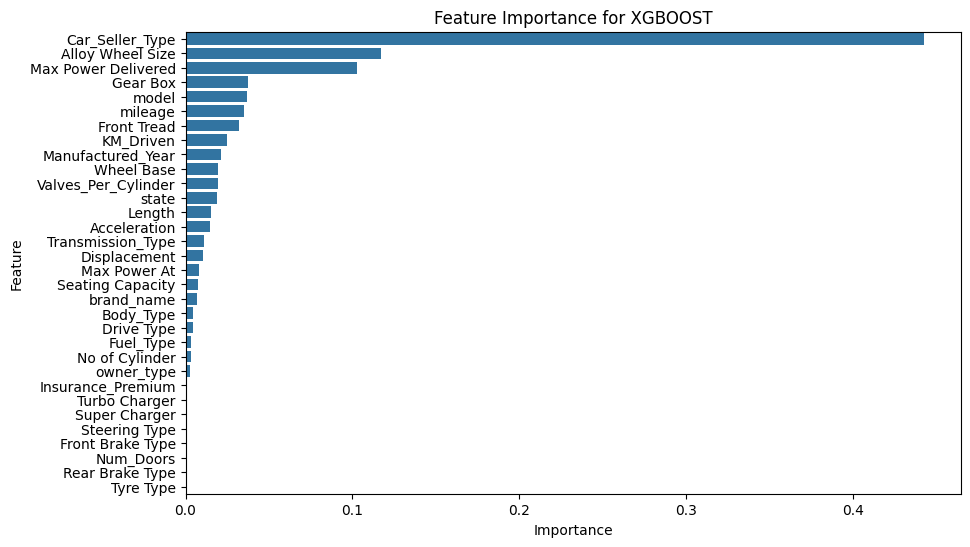

In [50]:
import seaborn as sns
from sklearn.model_selection import GridSearchCV, KFold
import matplotlib.pyplot as plt
importance = best_model.feature_importances_
feature_importance_df = pd.DataFrame({
        'Feature': X.columns,
        'Importance': importance
    }).sort_values(by='Importance', ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance for XGBOOST')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In [5]:
temp=cars_data_final.sample(frac=0.2).reset_index(drop=True)

In [6]:

X = temp.drop(columns=['Listed_Price'])
y = temp['Listed_Price']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing and fitting the MinMaxScaler for X values
scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

# Initializing and fitting the MinMaxScaler for y values
scaler_y = RobustScaler(quantile_range=(0.25,0.75))
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1)).flatten()
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1)).flatten()

model=RandomForestRegressor()

model.fit(X_train_scaled,y_train_scaled)

y_pred_scaled = model.predict(X_test_scaled)
y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).flatten()

r2_score(y_test, y_pred)

0.9257726023057901

In [10]:
model.feature_importances_

array([7.21618743e-03, 1.44788770e-02, 6.98911959e-03, 1.35865576e-01,
       1.45293067e-03, 2.21642303e-03, 2.33998496e-03, 5.58626066e-04,
       5.08345750e-04, 2.21939751e-02, 4.95742261e-04, 1.01100251e-02,
       4.34050165e-03, 4.22938729e-05, 0.00000000e+00, 0.00000000e+00,
       2.02232407e-02, 2.98870558e-02, 9.44881076e-03, 2.37113687e-02,
       2.58887905e-03, 4.78734093e-03, 7.31419803e-06, 9.20722384e-04,
       1.37546622e-03, 1.68798554e-02, 6.55882701e-04, 1.47408181e-03,
       5.14027119e-03, 1.02340134e-01, 4.94327179e-01, 7.74237880e-02])

Model_Name:Linear Regression
Model_Name:Random Forest
Model_Name:Adaboost
Model_Name:GradientBoostingRegressor
Model_Name:Ridge
Model_Name:XGBoost
Model XGBoost, best r2_score: 0.8835416962296126


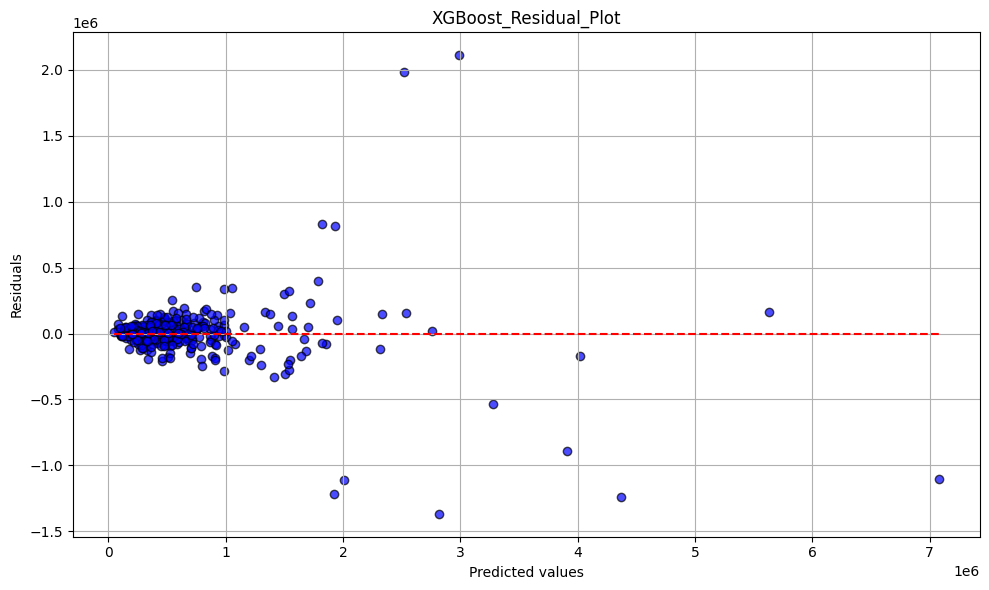

C:\Users\arnab\AppData\Local\Temp\ipykernel_132768\2002783110.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=df, palette='viridis')


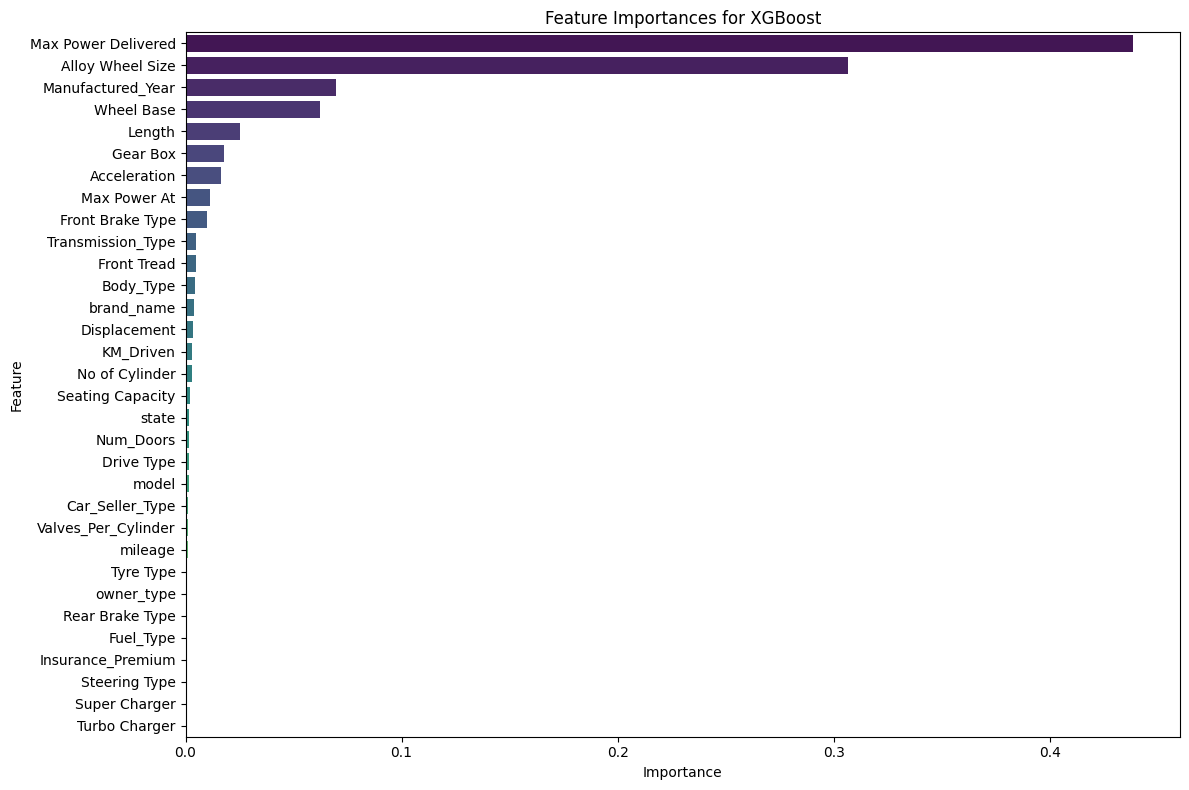

Model_Name:CatBoostRegressor


In [9]:
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
import seaborn as sns
from sklearn.model_selection import GridSearchCV, KFold
import matplotlib.pyplot as plt
def plot_residuals(y_true, y_pred, model_name):
    residuals = y_true - y_pred
    plt.figure(figsize=(10, 6))
    plt.scatter(y_pred, residuals, color='blue', edgecolor='k', alpha=0.7)
    plt.hlines(y=0, xmin=min(y_pred), xmax=max(y_pred), color='red', linestyle='--')
    plt.xlabel('Predicted values')
    plt.ylabel('Residuals')
    plt.title(f'{model_name}_Residual_Plot')
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(f'src/utils/objects/{model_name}_residuals_plot.png')
    plt.show()
    plt.close()

def plot_feature_importances(importance, features, model_name, title='Feature Importances'):
    df = pd.DataFrame({'Feature': features, 'Importance': importance})
    df = df.sort_values(by='Importance', ascending=False)
    plt.figure(figsize=(12, 8))
    sns.barplot(x='Importance', y='Feature', data=df, palette='viridis')
    plt.title(f'{title} for {model_name}')
    plt.tight_layout()
    plt.savefig(f'{model_name}_feature_importances.png')
    plt.show()
    plt.close()

def best_model(model_data,configs):
    model_data=model_data.sample(frac=0.2).reset_index(drop=True)
    X = model_data.drop(columns=['Listed_Price'],axis=1)
    y = model_data['Listed_Price']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    scalers = {
        'MinMaxScaler': MinMaxScaler(),
        'RobustScaler': RobustScaler(),
        'StandardScaler': StandardScaler()
    }
    models = {
        'Linear Regression': {
            'model': LinearRegression(),
            'params': {
                'fit_intercept': [True, False]
            }
        },
        'Random Forest': {
            'model': RandomForestRegressor(),
            'params': {
                'n_estimators': [100,150,200,250,300],
                'max_depth': [None, 10, 15,20],
                'min_samples_split': [2, 5, 10]
            }
        },
        'Adaboost':{
            'model': AdaBoostRegressor(),
            'params':{
                    'n_estimators': [50, 100, 200],
                    'learning_rate': [0.01, 0.1, 0.5],
                    'loss': ['linear', 'square', 'exponential']
            }
        },
        'GradientBoostingRegressor':{
            'model': GradientBoostingRegressor(),
            'params':{
                    'n_estimators': [50, 100, 200],
                    'learning_rate': [0.01, 0.1, 0.2],
                    'max_depth': [3, 4, 5],
                    'min_samples_split': [2, 5, 10],
                    'min_samples_leaf': [1, 2, 4],
                    'subsample': [0.8, 0.9, 1.0]
                }
        },
        
        'Ridge': {
            'model': Ridge(),
            'params': {
                'alpha': [0.1, 1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
            }
        },
        'XGBoost':{
            'model': XGBRegressor(),
            'params':{
                'n_estimators': [100]}
        },
        'CatBoostRegressor':{
            'model': CatBoostRegressor(),
            'params': {
            'learning_rate': [0.01, 0.05, 0.1, 0.2],
            'depth': [4, 6, 8, 10],
            'iterations': [10000],
            'l2_leaf_reg': [1, 3, 5, 7],
            'border_count': [32, 50, 100],
            'bagging_temperature': [0.1,0.2,0.3,0.4,0.5],
            'verbose':[0],
            'random_strength': [0.5, 1.0, 1.5],
            'scale_pos_weight': [1, 2, 3],
            'min_data_in_leaf': [1, 5, 10],
            'grow_policy': ['SymmetricTree', 'Depthwise', 'Lossguide'],
            'cat_features': [None]
        }
        }
    }
    for scaler_name, scaler in scalers.items():
            scaler_X = scaler
            X_train_scaled = scaler_X.fit_transform(X_train)
            X_test_scaled = scaler_X.transform(X_test)

            # Initializing and fitting the MinMaxScaler for y values
            scaler_y = scaler
            y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1)).flatten()
            y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1)).flatten()
            # Setting up k-fold cross-validation and GridSearchCV
            kf = KFold(n_splits=5, shuffle=True, random_state=42)
            for model_name, config in models.items():
                print(f'Model_Name:{model_name}')
                if model_name=='XGBoost':
                    grid_search = GridSearchCV(config['model'], config['params'], cv=kf, scoring='r2', n_jobs=-1)
                    grid_search.fit(X_train_scaled, y_train_scaled)
                        
                    best_model = grid_search.best_estimator_
                    best_params = grid_search.best_params_
                    best_score = grid_search.best_score_
                        
                    # Predicting and inverse transforming the predictions
                    y_pred_scaled = best_model.predict(X_test_scaled)
                    y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).flatten()
                        
                    # Evaluate the model
                    r2 = r2_score(y_test, y_pred)
                    print(f'Model {model_name}, best r2_score: {r2}')
                    # Log parameters and metrics
                    
                    # Log the model
                    plot_residuals(y_test, y_pred, model_name)
                    
                    if hasattr(best_model, 'feature_importances_'):
                        feature_importances = best_model.feature_importances_
                        features = X.columns
                        plot_feature_importances(feature_importances, features, model_name)
            break
best_model(temp,0)                    


In [116]:
temp.shape

(7350, 33)

In [71]:
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
# Assuming `model_data` is your DataFrame with 30 independent features and a target column 'Listed_Price'
X = cars_data_final.drop(columns=['Listed_Price'])
y = cars_data_final['Listed_Price']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a pipeline for PCA and scaling
pipeline = Pipeline([
    ('pca', PCA(n_components=30)),  # Reduce to 10 features
    ('scaler',StandardScaler()),
    ('regressor', XGBRegressor(n_estimators=15))  # Linear Regression model
])

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

# Predict on the test data
y_pred = pipeline.predict(X_test)

# Evaluate the model
r2 = r2_score(y_test, y_pred)

print(f"R^2 Score: {r2}")

R^2 Score: 0.37862777259523295


In [ ]:
pipeline.feature

In [49]:
best_model.feature_importances_

array([0.00694683, 0.03692342, 0.01857999, 0.02144555, 0.00284988,
       0.00442381, 0.01078114, 0.00107173, 0.00299588, 0.02491721,
       0.4423228 , 0.010417  , 0.00299004, 0.01954439, 0.        ,
       0.        , 0.01537685, 0.01960768, 0.03216841, 0.03721819,
       0.00422591, 0.00772843, 0.        , 0.        , 0.        ,
       0.0145534 , 0.        , 0.        , 0.03480276, 0.11692598,
       0.1030587 , 0.00812406], dtype=float32)

In [12]:
# Assuming `model_data` is your DataFrame
def find_categorical_feature_indices(df):
    # Identify categorical features based on dtype
    categorical_features = df.select_dtypes(include=['object', 'category']).columns.tolist()

    # Alternatively, use unique values to identify categorical features
    unique_value_threshold = 40
    for column in df.columns:
        if df[column].nunique() < unique_value_threshold and df[column].dtype in ['int64', 'float64']:
            if column not in categorical_features:
                categorical_features.append(column)

    # Remove duplicates if any
    categorical_features = list(set(categorical_features))
    
    # Get the indices of the categorical features
    categorical_feature_indices = [df.columns.get_loc(col) for col in categorical_features]
    
    return categorical_feature_indices

# Sample DataFrame for demonstration
# df = pd.read_csv('your_file.csv')

# Find categorical feature indices
categorical_feature_indices = find_categorical_feature_indices(cars_data_final)
print("Categorical Feature Indices:", categorical_feature_indices)

Categorical Feature Indices: [29, 26, 24, 4, 19, 20, 23, 2, 8, 22, 7, 13, 12, 5, 10, 3, 6, 27, 21]


In [12]:
import os
def clean_dir(directory_path):
    for root, dirs, files in os.walk(directory_path):
        for file in files:
            file_path = os.path.join(root, file)
            print(f'Removed file: {file_path}')

Removed file: artifacts/raw_data\cars_data_clean.csv
Removed file: artifacts/raw_data\cars_data_final.csv
Removed file: artifacts/raw_data\cars_details_merges.csv
Removed file: artifacts/raw_data\feature_dictionary.csv
